### 10 Removing noise using Gaussian, median, bilateral filters

- 모든 실제 이미지에는 많은 노이즈가 포함되어있음
- 노이즈는 이미지의 형태를 망가뜨릴 뿐만 아니라 알고리즘의 입력으로 처리하기에도 좋지 않은 영향을 준다
- 여기서는 노이즈를 제거하거나 극적으로 감소시키는 방법을 다룬다

1. 모듈을 가져오고 이미지를 불러와 [0,1] 사이의 float 데이터 타입으로 변환한다

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../data/Lena.png').astype('float32') / 255

2. 각 픽셀에 임의의 값을 더해 이미지에 노이즈를 생성하고 화면에 표시한다

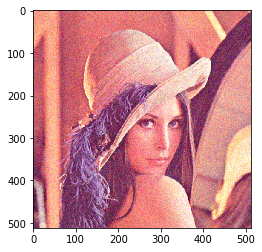

In [7]:
noised = (image + 0.2 * np.random.rand(*image.shape).astype(np.float32))
noised = noised.clip(0, 1)
plt.imshow(noised[:, :, [2,1,0]])
plt.show()

3. 노이즈가 있는 이미지에 GaussianBlur 를 적용하고 결과를 출력하기

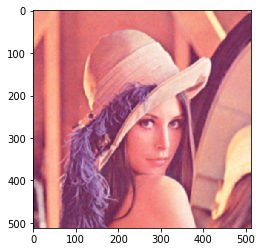

In [21]:
gauss_blur = cv2.GaussianBlur(noised, (7,7), 0)
plt.imshow(gauss_blur[:,:,[2,1,0]])
plt.show()

- 가우시안 필터
    - 이 함수는 입력이미지, 커널 크기(커널 너비, 높이), 
    - 너비와 높이에 대한 표준 편차를 매개변수로 받음
    - 매개변수 중 커널 크기는 홀수인 양수다
    - 높이에 따른 표준 편차가 지정되지 않았거나,
    - 0으로 설정된 경우 X 표준 편차의 값이 양방향에 사용됨
    - 또한 X 표준 편차를 0 으로 변경하면 커널 크기로 표준 편차가 계산된다

4. medianBlur 를 적용하기

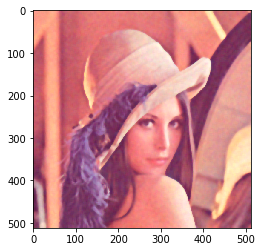

In [32]:
median_blur = cv2.medianBlur((noised*255).astype(np.uint8), 7)
plt.imshow(median_blur[:, :, [2, 1, 0]])
plt.show()

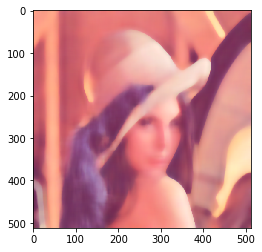

In [33]:
median_blur = cv2.medianBlur((noised*255).astype(np.uint8), 21)
plt.imshow(median_blur[:, :, [2, 1, 0]])
plt.show()

- median blur
    - 첫번쨰 인자로 입력 이미지를 받고
    - 두번째 인자로 커널의 크기를 받음
    - 가우시안과 마찬가지로 커널의 크기는 홀수인 양수다


5. 노이즈가 있는 이미지에 bilateralFilter 를 적용하기

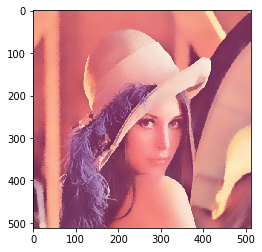

In [34]:
bilat = cv2.bilateralFilter(noised, -1, 0.3, 10)
plt.imshow(bilat[:, :, [2, 1, 0]])
plt.show()

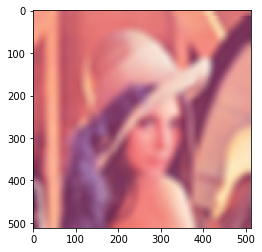

In [62]:
bilat = cv2.bilateralFilter(noised, -1, 5.3, 10)
plt.imshow(bilat[:, :, [2, 1, 0]])
plt.show()

- 양방향 필터링
    - 이 함수는 입력 이미지, 윈도우의 크기와 색상, 공간 시그마 값을 받음
    - 윈도우 크기가 음수면 공간 시그마 값을 사용해 계산한다